In [1]:
import pandas as pd

In [4]:
npr = pd.read_csv('npr.csv')

In [5]:
npr.head(30)

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."
5,I did not want to join yoga class. I hated tho...
6,With a who has publicly supported the debunk...
7,"I was standing by the airport exit, debating w..."
8,"If movies were trying to be more realistic, pe..."
9,"Eighteen years ago, on New Year’s Eve, David F..."


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(npr['Article'])

In [8]:
len(cv.get_feature_names_out())

54777

In [12]:
import random
for i in range(10):
    random_word_id = random.randint(0,54776)
    print(cv.get_feature_names_out()[random_word_id])

netflix
interstitial
chechen
assignment
teleprompters
1761
516
lizards
overpower
duran


In [14]:
# Apply LDA
# try different number of components to find the best accuracy

from sklearn.decomposition import LatentDirichletAllocation

for n in [5,7,10,12,15]:
    LDA = LatentDirichletAllocation(n_components=n,random_state=42)
    LDA.fit(dtm)
    print(f'LDA model with {n} components created.')
    # check accuracy
    len(LDA.components_)
    print(f'Accuracy: {LDA.perplexity(dtm)}')
    print(cv.get_feature_names_out()[random_word_id])

LDA model with 5 components created.
Accuracy: 5695.842570307865
duran
LDA model with 7 components created.
Accuracy: 5537.59372192335
duran
LDA model with 10 components created.
Accuracy: 5419.006023518666
duran
LDA model with 12 components created.
Accuracy: 5431.3460612353065
duran
LDA model with 15 components created.
Accuracy: 5349.084574365986
duran


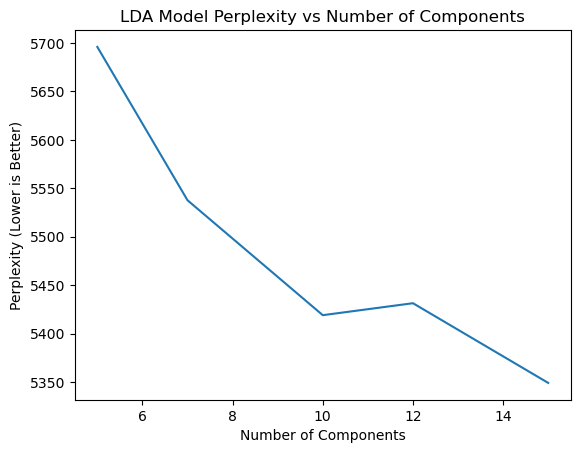

In [21]:
# draw n_components vs accuracy graph
import matplotlib.pyplot as plt
n_components = [5,7,10,12,15]
accuracies = []
# draw n_components vs accuracy graph
import matplotlib.pyplot as plt
n_components = [5,7,10,12,15]
accuracies = [5695.842570307865, 5537.59372192335, 5419.006023518666, 5431.3460612353065, 5349.084574365986]
plt.plot(n_components, accuracies)
plt.xlabel('Number of Components')
plt.ylabel('Perplexity (Lower is Better)')
plt.title('LDA Model Perplexity vs Number of Components')
plt.show()

In [15]:
# work with n_components=7 as it has the best accuracy
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(dtm)
len(LDA.components_)
LDA.perplexity(dtm)
LDA.components_.shape

(7, 54777)

In [16]:
LDA.components_

array([[8.64332806e+00, 2.38014333e+03, 1.42900522e-01, ...,
        1.43006821e-01, 1.42902042e-01, 1.42861626e-01],
       [2.76191749e+01, 5.36394437e+02, 1.42857148e-01, ...,
        1.42861973e-01, 1.42857147e-01, 1.42906875e-01],
       [7.22783888e+00, 8.24033986e+02, 1.42857148e-01, ...,
        6.14236247e+00, 2.14061364e+00, 1.42923753e-01],
       ...,
       [3.11488651e+00, 3.50409655e+02, 1.42857147e-01, ...,
        1.42859912e-01, 1.42857146e-01, 1.42866614e-01],
       [4.61486388e+01, 5.14408600e+01, 3.14281373e+00, ...,
        1.43107628e-01, 1.43902481e-01, 2.14271779e+00],
       [4.93991422e-01, 4.18841042e+02, 1.42857151e-01, ...,
        1.42857146e-01, 1.43760101e-01, 1.42866201e-01]], shape=(7, 54777))

In [17]:
len(LDA.components_) , len(LDA.components_[0])

(7, 54777)

In [18]:
single_topic = LDA.components_[0]
single_topic.argsort()

array([ 2475, 18302, 35285, ..., 22673, 42561, 42993], shape=(54777,))

In [19]:
single_topic.argsort()[-10:]

array([33390, 36310, 21228, 10425, 31464,  8149, 36283, 22673, 42561,
       42993])

In [20]:
for index in single_topic.argsort()[-10:]:
    print(cv.get_feature_names()[index])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['companies', 'money', 'year', 'federal', '000', 'new', 'percent', 'government', 'company', 'million', 'care', 'people', 'health', 'said', 'says']


THE TOP 15 WORDS FOR TOPIC #1
['military', 'house', 'security', 'russia', 'government', 'npr', 'reports', 'says', 'news', 'people', 'told', 'police', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['way', 'world', 'family', 'home', 'day', 'time', 'water', 'city', 'new', 'years', 'food', 'just', 'people', 'like', 'says']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'new', 'don', 'years', 'medical', 'disease', 'patients', 'just', 'children', 'study', 'like', 'women', 'health', 'people', 'says']


THE TOP 15 WORDS FOR TOPIC #4
['voters', 'vote', 'election', 'party', 'new', 'obama', 'court', 'republican', 'campaign', 'people', 'state', 'president', 'clinton', 'said', 'trump']


THE TOP 15 WORDS FOR TOPIC #5
['years', 'going', 've', 'life', 'don', 'new', 'way', 'music', 'really', 'time', 'know', 'think',

In [ ]:
topic_results = LDA.transform(dtm)

In [ ]:
topic_results.shape

(11992, 7)

In [ ]:
topic_results[0].round(2)

array([0.02, 0.68, 0.  , 0.  , 0.3 , 0.  , 0.  ])

In [ ]:
topic_results.argmax(axis=1)

array([1, 1, 1, ..., 3, 4, 0], dtype=int64)

In [ ]:
npr['Topic'] = topic_results.argmax(axis=1)
npr.head(10)

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",2
5,I did not want to join yoga class. I hated tho...,3
6,With a who has publicly supported the debunk...,3
7,"I was standing by the airport exit, debating w...",2
8,"If movies were trying to be more realistic, pe...",3
9,"Eighteen years ago, on New Year’s Eve, David F...",2
